# Traffic Light Detection
## Phase 1

In [385]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import numpy as np
from scipy import signal
import glob
import sys

In [386]:
def high_pass(img):
    mask = np.array([[-1, -1, -1],[-1,  8, -1], [-1, -1, -1]])/9
    hp = abs(ndimage.convolve(img[:,:,0], mask))
    #hp = abs(signal.convolve2d(img[:,:,0]/img[:,:,1], mask, mode= 'same'))
    return hp

In [387]:
def local_maximum(img):
    return ndimage.maximum_filter(img, size=17)

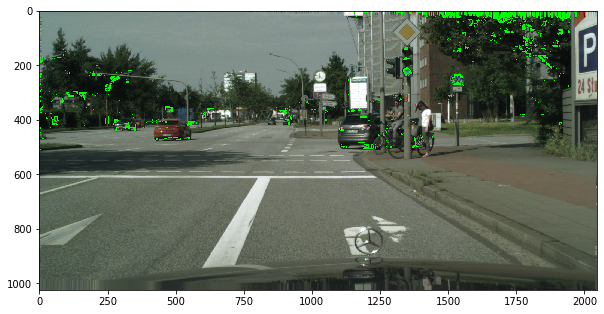

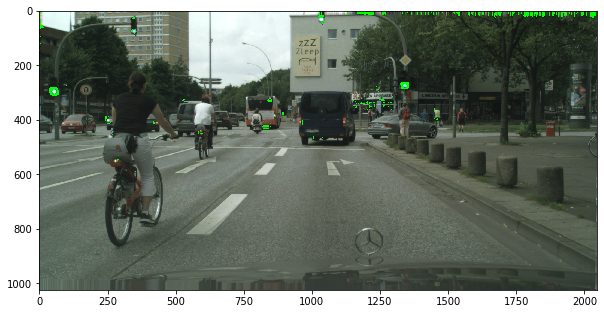

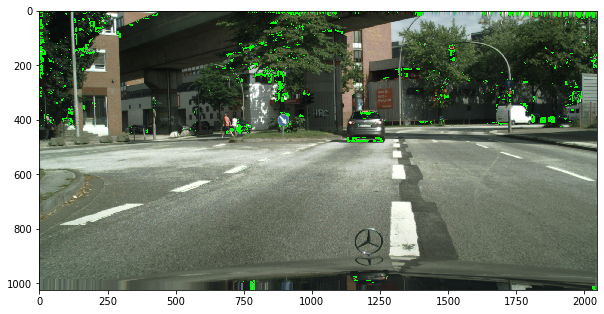

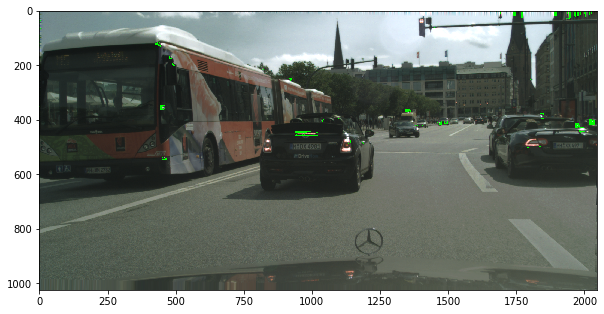

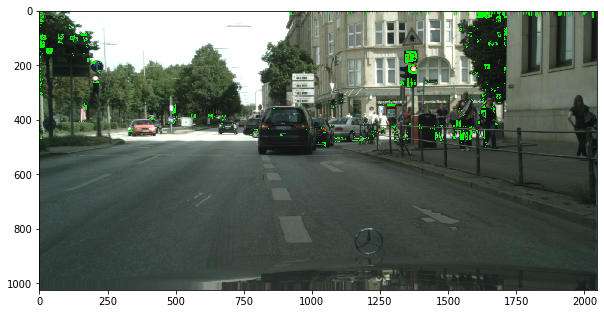

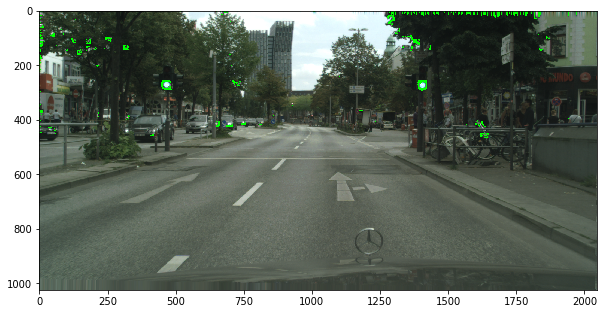

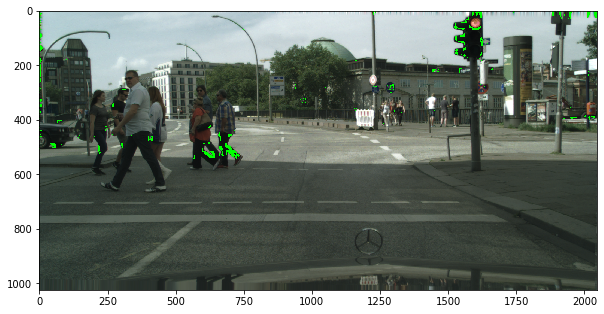

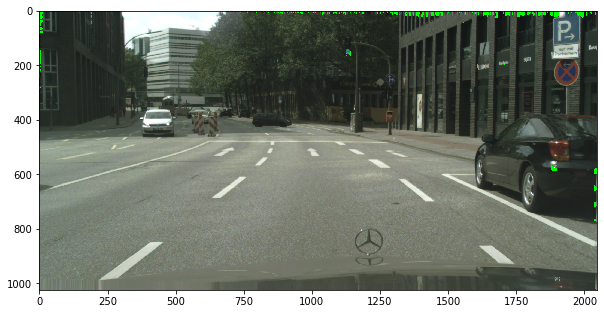

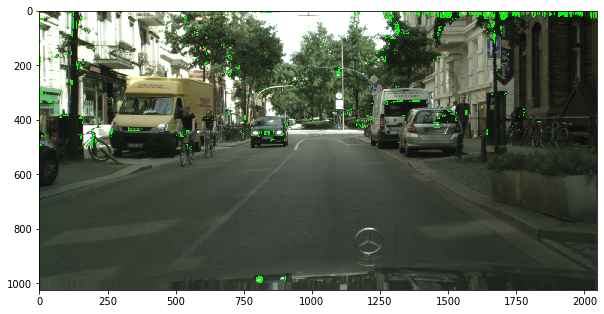

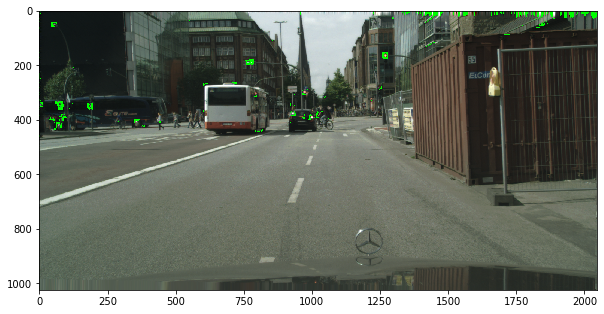

In [388]:
for filename in glob.glob(r'C:\Users\USER\BootCamp\Python\Mobileye Project\CityScapes\test_files\*.png'):
    img_ = imageio.imread(filename)/255
    r,c,_= img_.shape
    img=img_[0:int(r*60),:,:]
    hp_img = high_pass(img)  
    mf_img = local_maximum(hp_img)
    mat=(mf_img > img[:,:,0])
    res = img.copy()
    res[mat]=[0,1,0]
    plt.figure(figsize=(10,10))
    #plt.subplot(1, 2, 1), plt.imshow(img)
    plt.imshow(res)